<a href="https://colab.research.google.com/github/mariaaapetrovskaya/complingua/blob/main/%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22convnet_hw_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


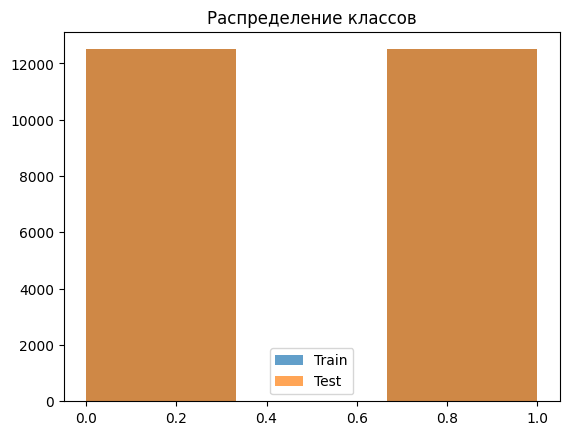

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

train_ds, test_ds = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)

x_train, y_train = [], []
for text, label in train_ds:
    x_train.append(text.numpy().decode('utf-8'))
    y_train.append(label.numpy())

x_test, y_test = [], []
for text, label in test_ds:
    x_test.append(text.numpy().decode('utf-8'))
    y_test.append(label.numpy())

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")


plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

In [2]:
vectorizer = keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=200)

vectorizer.adapt(x_train)

x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


In [3]:
model = keras.Sequential([
    keras.layers.Input(shape=(200,), dtype='int64'),
    keras.layers.Embedding(input_dim=10000, output_dim=128),
    keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 69ms/step - accuracy: 0.6845 - loss: 0.5567 - precision: 0.6850 - recall: 0.6670 - val_accuracy: 0.8366 - val_loss: 0.3539 - val_precision: 0.7886 - val_recall: 0.9253
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.9221 - loss: 0.2086 - precision: 0.9166 - recall: 0.9299 - val_accuracy: 0.8700 - val_loss: 0.3130 - val_precision: 0.8652 - val_recall: 0.8803
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9893 - loss: 0.0527 - precision: 0.9891 - recall: 0.9896 - val_accuracy: 0.8692 - val_loss: 0.3831 - val_precision: 0.9044 - val_recall: 0.8293
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.9995 - loss: 0.0079 - precision: 0.9992 - recall: 0.9997 - val_accuracy: 0.8736 - val_loss: 0.4333 - val_precision: 0.8719 - val_recall: 0.8795
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 69ms/step - accuracy: 1.0000 - loss: 0.0015 - precision: 0.9999 - recall: 1.0000 - val_accuracy: 0.8758 - val_los

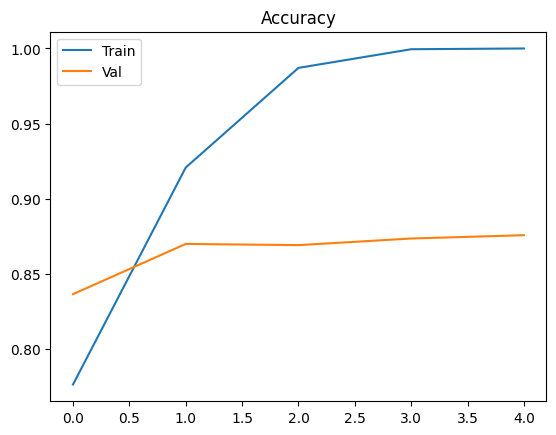

In [4]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

history = model.fit(
    x_train_vec, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=1
)

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

In [5]:
test_loss, test_acc, test_prec, test_rec = model.evaluate(x_test_vec, y_test, verbose=0)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")


for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"

    pred_prob = model.predict(x_test_vec[i:i+1], verbose=0)
    pred_label = "POS" if pred_prob > 0.5 else "NEG"
    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

Тестовая accuracy: 0.8644
Тестовая precision: 0.8635
Тестовая recall: 0.8657
There are films that make careers. For George Rome... | True: POS | Pred: POS (0.98)
A blackly comic tale of a down-trodden priest, Naz... | True: POS | Pred: POS (0.98)
Scary Movie 1-4, Epic Movie, Date Movie, Meet the ... | True: NEG | Pred: NEG (0.00)
Poor Shirley MacLaine tries hard to lend some grav... | True: NEG | Pred: NEG (0.00)
As a former Erasmus student I enjoyed this film ve... | True: POS | Pred: POS (1.00)
My God, Ryan Gosling has made a lot of deep charac... | True: POS | Pred: POS (1.00)
This film just won the best film award at the Clev... | True: POS | Pred: POS (1.00)
The cast for this production of Rigoletto is excel... | True: POS | Pred: POS (1.00)
As long as you keep in mind that the production of... | True: NEG | Pred: NEG (0.00)
Every great once in a while, you stumble upon a mo... | True: POS | Pred: NEG (0.40)


Какая итоговая точность (accuracy) на тесте?
Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд

Мои ответы:
итоговая accuracy около 0.8644
разница небольшая, переобучение минимальное (validation accuracy близко к training accuracy)
неверно - 10 отзыв: Every great once in a while, you stumble upon a mo... | True: POS | Pred: NEG (0.40) Может, дело в идиоме или фрпзе stumble upon (посчитала как negative). Отзыв не очень прозрачный